In [1]:
###################

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import itertools
import os
from matplotlib import cm

from autoload_models import FindLowestCadenaVgg,   FindLowestCadenaInception   # Used to get the loss for a given model
from autoload_models import FindLowestBashivanVgg, FindLowestBashivanInception   # Used to get the loss for a given model
from autoload_models import layer_minimization_per_roi

In [2]:
neurons_per_roi = {1: 43, 2: 62, 3: 55, 4: 50, 5: 51, 7: 53, 8: 60, 9: 43, 10: 44, 11: 53, 12: 29, 13: 17, 14: 24, 15: 59, 16: 24}

vgg_layers = [0,2,5,7,10,12,14,16,19,21,23,25,28,30,32,34]
inception_layers  = ['conv2d0', 'conv2d1', 'conv2d2', 'mixed4a', 'mixed4b', 'mixed4c', 'mixed4d', 'mixed4e', 'mixed5a', 'mixed5b']
rois = list(range(1,17))

In [ ]:
def rectangle(x, y, color = 'r', lw = 5):
    plt.plot((x-.5,x+.5), (y-.5, y-.5), linewidth = lw, color = color)
    plt.plot((x-.5,x+.5), (y+.5, y+.5), linewidth = lw, color = color)

    plt.plot((x-.5,x-.5), (y+.5, y-.5), linewidth = lw, color = color)
    plt.plot((x+.5,x+.5), (y+.5, y-.5), linewidth = lw, color = color)


In [3]:
#### Cadena Vgg

rois    = []
layers  = []

for i in glob('Results_no_transform/Cadena_Vgg/*.npy'):
    name = i.split('/')[-1].split('.')[0].split('_')
    rois.append(int(name[name.index('roi')+1]))
    layers.append(int(name[name.index('layer')+1]))

rois_s = sorted(np.unique(rois))
layers_s = sorted(np.unique(layers))



size_square = 180
assert size_square%2 == 0
border = (size_square-128)//2

collage = np.zeros((3, size_square*len(rois_s), size_square*len(layers_s)))
collage = np.full((size_square*len(rois_s), size_square*len(layers_s), 3), (0.74,0.74,0.74)).transpose(2,0,1)

for (n_roi, roi), (n_layer, layer) in itertools.product(enumerate(rois_s), enumerate(layers_s)):
    
    if len(glob(f'Results_no_transform/Cadena_Vgg/Cadena_Vgg_roi_{roi}_layer_{layer}.npy'))==1:
        im_load = np.load(glob(f'Results_no_transform/Cadena_Vgg/Cadena_Vgg_roi_{roi}_layer_{layer}.npy')[0])[0, :]
        


 
        model_name = FindLowestCadenaVgg(int(roi), int(layer)).split('/')[-1].split('_')
        loss = float(model_name[model_name.index('loss')+1])
        print(loss)

        vals = np.array(cm.RdYlGn_r(loss/.3)[:-1])
        print(vals)
        collage[:, n_roi*size_square:(n_roi+1)*size_square, n_layer*size_square:(n_layer+1)*size_square] = np.full((size_square, size_square, 3), vals).transpose(2,0,1)
        
        collage[:, n_roi*size_square+border:n_roi*size_square+border+128, n_layer*size_square+border:n_layer*size_square+border+128] = im_load.transpose(2,0,1)

    else:
        pass

0.11338054773093788
[0.80392157 0.91695502 0.51464821]
0.3304260607609344
[0.64705882 0.         0.14901961]
0.10835288740866746
[0.77254902 0.90342176 0.49434833]
0.10758378246867381
[0.76470588 0.90003845 0.48927336]
0.12477575735032329
[0.87435602 0.94709727 0.57708574]
0.1082198576716971
[0.77254902 0.90342176 0.49434833]
0.11893511807213468
[0.84313725 0.93387159 0.54002307]
0.13637700395237146
[0.93279508 0.97170319 0.65705498]
0.37748482977124787
[0.64705882 0.         0.14901961]
0.4290953381704483
[0.64705882 0.         0.14901961]
0.11770669987000686
[0.83529412 0.93048827 0.5349481 ]
0.1202254258002914
[0.85098039 0.9372549  0.54509804]
0.12173024391003272
[0.8568243  0.93971549 0.55309496]
0.09626608915679055
[0.69411765 0.86958862 0.44359862]
0.07697181607735529
[0.53779316 0.80146098 0.40330642]
0.08382682167615178
[0.59684737 0.82729719 0.40976547]
0.36987306888301696
[0.64705882 0.         0.14901961]
0.09946441097477342
[0.70980392 0.87635525 0.45374856]
0.107897806017

In [22]:
np.where(np.array(vgg_layers)==21)

(array([9]),)

In [77]:
layer_minimization = layer_minimization_per_roi('Cadena', 'Vgg')
print(layer_minimization)

[None, 21, 12, 19, 19, None, 19, 12, 19, 19, 23, 28, 30, 28, 32, 30]


In [78]:
len(np.where(np.array(layer_minimization)!=None)[0].tolist())

14

In [76]:
[int(np.where(np.array(layers_s)==i)[0]) for i in [x for x in layer_minimization if x!=None]]

[7, 3, 6, 6, 6, 3, 6, 6, 8, 10, 11, 10, 12, 11]

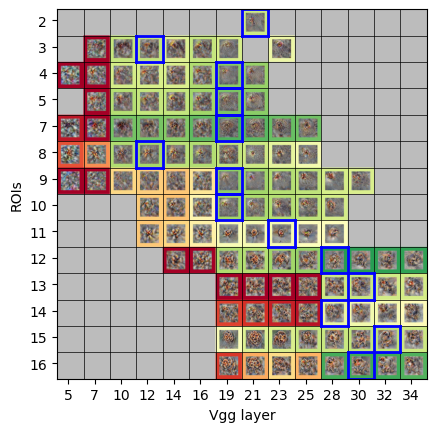

In [79]:
for i in range(size_square, len(rois_s)*size_square, size_square):
    plt.hlines(i, 0, np.max(collage.shape), color = 'k', lw = .5)
for i in range(size_square, len(rois_s)*size_square, size_square):
    plt.vlines(i, 0, np.max(collage.shape), color = 'k', lw = .5)


layer_minimization = layer_minimization_per_roi('Cadena', 'Vgg')
len_layer_minimization = len(np.where(np.array(layer_minimization)!=None)[0].tolist())
x_positions = [int(np.where(np.array(layers_s)==i)[0]) for i in [x for x in layer_minimization if x!=None]]

lw = 2

for x, y in zip(x_positions, list(range(1,len_layer_minimization+1))):
    y = y-1
    plt.plot((x*size_square, (x+1)*size_square), (y*size_square,y*size_square), lw = lw, color = 'blue')
    plt.plot((x*size_square, (x+1)*size_square), ((y+1)*size_square, (y+1)*size_square),   lw = lw, color = 'blue')

    plt.plot((x*size_square, x*size_square), ((y+1)*size_square, y*size_square), lw = lw, color = 'blue')
    plt.plot(((x+1)*size_square, (x+1)*size_square), ((y+1)*size_square, y*size_square), lw = lw, color = 'blue')

plt.imshow(collage.transpose(1,2,0))
plt.yticks([size_square*i+75 for i in range(14)], map(str, rois_s))
plt.xticks([size_square*i+75 for i in range(14)], map(str, layers_s))
plt.ylabel('ROIs')
plt.xlabel('Vgg layer')
plt.savefig('Cadena_Vgg_imgs.png', dpi = 1200)

In [6]:
#### Cadena Inception

In [84]:
rois    = []
layers  = []

for i in glob('Results_no_transform/Cadena_Inception/*.npy'):
    name = i.split('/')[-1].split('.')[0].split('_')
    rois.append(int(name[name.index('roi')+1]))
    layers.append(name[name.index('layer')+1])

rois_s = sorted(np.unique(rois))
layers_s = sorted(np.unique(layers))



size_square = 200
assert size_square%2 == 0
border = (size_square-128)//2

collage = np.zeros((3, size_square*len(rois_s), size_square*len(layers_s)))
collage = np.full((size_square*len(rois_s), size_square*len(layers_s), 3), (0.74,0.74,0.74)).transpose(2,0,1)

for (n_roi, roi), (n_layer, layer) in itertools.product(enumerate(rois_s), enumerate(layers_s)):
    
    if len(glob(f'Results_no_transform/Cadena_Inception/Cadena_Inception_roi_{roi}_layer_{layer}.npy'))==1:
        im_load = np.load(glob(f'Results_no_transform/Cadena_Inception/Cadena_Inception_roi_{roi}_layer_{layer}.npy')[0])[0, :]
        


 
        model_name = FindLowestCadenaInception(int(roi), layer).split('/')[-1].split('_')
        loss = float(model_name[model_name.index('loss')+1])
        print(loss)

        vals = np.array(cm.RdYlGn_r(loss/.3)[:-1])
        print(vals)
        collage[:, n_roi*size_square:(n_roi+1)*size_square, n_layer*size_square:(n_layer+1)*size_square] = np.full((size_square, size_square, 3), vals).transpose(2,0,1)
        
        collage[:, n_roi*size_square+border:n_roi*size_square+border+128, n_layer*size_square+border:n_layer*size_square+border+128] = im_load.transpose(2,0,1)

    else:
        pass


0.11208251290660329
[0.79607843 0.9135717  0.50957324]
0.10082763860176155
[0.7254902  0.88312188 0.4638985 ]
0.0953264129816454
[0.68627451 0.86620531 0.43852364]
0.12173772333945314
[0.8568243  0.93971549 0.55309496]
0.1273950349061009
[0.88604383 0.95201845 0.59307958]
0.13592845516998006
[0.92695117 0.9692426  0.64905805]
0.13860331030804
[0.94448289 0.97662438 0.67304883]
0.13390839541835292
[0.92110727 0.96678201 0.64106113]
0.14728523777151986
[0.98539023 0.99384852 0.7290273 ]
0.15492802641991377
[0.99930796 0.97854671 0.71303345]
0.09788458685903907
[0.70196078 0.87297193 0.44867359]
0.10467409196245266
[0.74901961 0.89327182 0.47912341]
0.09786408939697498
[0.70196078 0.87297193 0.44867359]
0.13554366016888483
[0.92695117 0.9692426  0.64905805]
0.13876780262498248
[0.94448289 0.97662438 0.67304883]
0.15192591255420265
[0.99976932 0.9928489  0.73702422]
0.15184040907378485
[0.99976932 0.9928489  0.73702422]
0.1422727351358796
[0.96201461 0.98400615 0.6970396 ]
0.15414525914631

In [85]:
layer_minimization

[None,
 'conv2d2',
 'conv2d2',
 'conv2d2',
 'conv2d2',
 None,
 'conv2d0',
 'conv2d2',
 'conv2d2',
 'conv2d2',
 'mixed4a',
 'mixed4e',
 'mixed5a',
 'conv2d0',
 None,
 None]

In [86]:
layers_s

['conv2d0',
 'conv2d1',
 'conv2d2',
 'mixed4a',
 'mixed4b',
 'mixed4c',
 'mixed4d',
 'mixed4e',
 'mixed5a',
 'mixed5b']

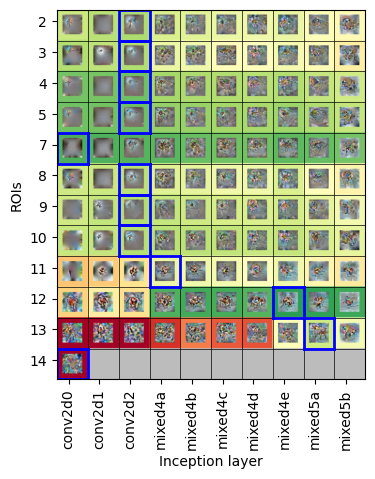

In [88]:
for i in range(size_square, len(rois_s)*size_square, size_square):
    plt.hlines(i, 0, np.max(collage.shape), color = 'k', lw = .5)
for i in range(size_square, len(rois_s)*size_square, size_square):
    plt.vlines(i, 0, np.max(collage.shape), color = 'k', lw = .5)

layer_minimization = layer_minimization_per_roi('Cadena', 'Inception')
len_layer_minimization = len(np.where(np.array(layer_minimization)!=None)[0].tolist())
x_positions = [int(np.where(np.array(layers_s)==i)[0]) for i in [x for x in layer_minimization if x!=None]]

lw = 2

for x, y in zip(x_positions, list(range(1,len_layer_minimization+1))):
    y = y-1
    plt.plot((x*size_square, (x+1)*size_square), (y*size_square,y*size_square), lw = lw, color = 'blue')
    plt.plot((x*size_square, (x+1)*size_square), ((y+1)*size_square, (y+1)*size_square),   lw = lw, color = 'blue')

    plt.plot((x*size_square, x*size_square), ((y+1)*size_square, y*size_square), lw = lw, color = 'blue')
    plt.plot(((x+1)*size_square, (x+1)*size_square), ((y+1)*size_square, y*size_square), lw = lw, color = 'blue')


plt.imshow(collage.transpose(1,2,0))
plt.yticks([size_square*i+75 for i in range(len(rois_s))], map(str, rois_s))
plt.xticks([size_square*i+75 for i in range(len(layers_s))], map(str, layers_s), fontsize = 10, rotation = 'vertical')
plt.ylabel('ROIs')
plt.xlabel('Inception layer')
plt.savefig('Cadena_Inception_imgs.png', dpi = 1200)

In [92]:
#### Bashivan Inception

rois    = []
layers  = []

for i in glob('Results_no_transform/Bashivan_Inception/*.npy'):
    name = i.split('/')[-1].split('.')[0].split('_')
    rois.append(int(name[name.index('roi')+1]))
    layers.append(name[name.index('layer')+1])

rois_s = sorted(np.unique(rois))
layers_s = sorted(np.unique(layers))



size_square = 180
assert size_square%2 == 0
border = (size_square-128)//2

collage = np.zeros((3, size_square*len(rois_s), size_square*len(layers_s)))
collage = np.full((size_square*len(rois_s), size_square*len(layers_s), 3), (0.74,0.74,0.74)).transpose(2,0,1)

for (n_roi, roi), (n_layer, layer) in itertools.product(enumerate(rois_s), enumerate(layers_s)):
    
    if len(glob(f'Results_no_transform/Bashivan_Inception/Bashivan_Inception_roi_{roi}_layer_{layer}.npy'))==1:
        im_load = np.load(glob(f'Results_no_transform/Bashivan_Inception/Bashivan_Inception_roi_{roi}_layer_{layer}.npy')[0])[0, :]
        

        model_name = FindLowestBashivanInception(int(roi), layer).split('/')[-1].split('_')
        loss = float(model_name[model_name.index('loss')+1])
        print(loss)

        vals = np.array(cm.RdYlGn_r(loss/.2)[:-1])
        print(vals)
        collage[:, n_roi*size_square:(n_roi+1)*size_square, n_layer*size_square:(n_layer+1)*size_square] = np.full((size_square, size_square, 3), vals).transpose(2,0,1)
        
        collage[:, n_roi*size_square+border:n_roi*size_square+border+128, n_layer*size_square+border:n_layer*size_square+border+128] = im_load.transpose(2,0,1)

    else:
        pass

0.11958969543031102
[0.99607843 0.87843137 0.54509804]
0.11651137982273559
[0.99669358 0.89750096 0.57708574]
0.09814611436891538
[0.98539023 0.99384852 0.7290273 ]
0.10370666804802833
[0.99930796 0.97854671 0.71303345]
0.10654067935430062
[0.99869281 0.95947712 0.68104575]
0.11264426142262765
[0.99746251 0.92133795 0.61707036]
0.10752735465642616
[0.99853902 0.95470973 0.67304883]
0.13612772423792172
[0.9928489  0.71695502 0.4094579 ]
0.1344136217429181
[0.99315648 0.73233372 0.42237601]
0.12506557672607788
[0.99500192 0.82460592 0.49988466]
0.11123535863014508
[0.99777009 0.93087274 0.63306421]
0.11152005698052517
[0.99777009 0.93087274 0.63306421]
0.11749950999609898
[0.99653979 0.89273356 0.56908881]
0.1208006287444272
[0.99592464 0.87074202 0.53863899]
0.12536580302071834
[0.99500192 0.82460592 0.49988466]
0.11425994555053019
[0.99715494 0.91180315 0.60107651]
0.1333842394541893
[0.99346405 0.74771242 0.43529412]
0.14469093188091836
[0.98316032 0.61737793 0.35040369]
0.08808333358

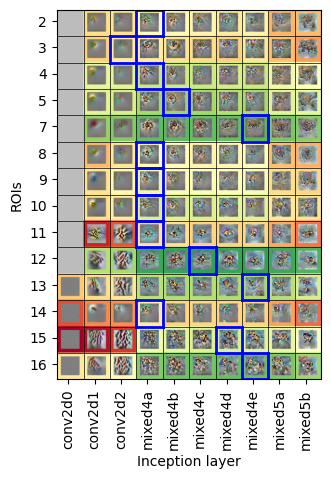

In [93]:
for i in range(size_square, len(rois_s)*size_square, size_square):
    plt.hlines(i, 0, np.max(collage.shape), color = 'k', lw = .5)
for i in range(size_square, len(rois_s)*size_square, size_square):
    plt.vlines(i, 0, np.max(collage.shape), color = 'k', lw = .5)


layer_minimization = layer_minimization_per_roi('Bashivan', 'Inception')
len_layer_minimization = len(np.where(np.array(layer_minimization)!=None)[0].tolist())
x_positions = [int(np.where(np.array(layers_s)==i)[0]) for i in [x for x in layer_minimization if x!=None]]

lw = 2

for x, y in zip(x_positions, list(range(1,len_layer_minimization+1))):
    y = y-1
    plt.plot((x*size_square, (x+1)*size_square), (y*size_square,y*size_square), lw = lw, color = 'blue')
    plt.plot((x*size_square, (x+1)*size_square), ((y+1)*size_square, (y+1)*size_square),   lw = lw, color = 'blue')

    plt.plot((x*size_square, x*size_square), ((y+1)*size_square, y*size_square), lw = lw, color = 'blue')
    plt.plot(((x+1)*size_square, (x+1)*size_square), ((y+1)*size_square, y*size_square), lw = lw, color = 'blue')



plt.imshow(collage.transpose(1,2,0))
plt.yticks([size_square*i+75 for i in range(len(rois_s))], map(str, rois_s))
plt.xticks([size_square*i+75 for i in range(len(layers_s))], map(str, layers_s), fontsize = 10, rotation = 'vertical')
plt.ylabel('ROIs')
plt.xlabel('Inception layer')
plt.savefig('Bashivan_Inception_imgs.png', dpi = 1200)

In [94]:
#### Bashivan Vgg

rois    = []
layers  = []

for i in glob('Results_no_transform/Bashivan_Vgg/*.npy'):
    name = i.split('/')[-1].split('.')[0].split('_')
    rois.append(int(name[name.index('roi')+1]))
    layers.append(int(name[name.index('layer')+1]))

rois_s = sorted(np.unique(rois))
layers_s = sorted(np.unique(layers))



size_square = 180
assert size_square%2 == 0
border = (size_square-128)//2

collage = np.zeros((3, size_square*len(rois_s), size_square*len(layers_s)))
collage = np.full((size_square*len(rois_s), size_square*len(layers_s), 3), (0.74,0.74,0.74)).transpose(2,0,1)

for (n_roi, roi), (n_layer, layer) in itertools.product(enumerate(rois_s), enumerate(layers_s)):
    
    if len(glob(f'Results_no_transform/Bashivan_Vgg/Bashivan_Vgg_roi_{roi}_layer_{layer}.npy'))==1:
        im_load = np.load(glob(f'Results_no_transform/Bashivan_Vgg/Bashivan_Vgg_roi_{roi}_layer_{layer}.npy')[0])[0, :]
        


 
        model_name = FindLowestBashivanVgg(int(roi), int(layer)).split('/')[-1].split('_')
        loss = float(model_name[model_name.index('loss')+1])
        print(loss)

        vals = np.array(cm.RdYlGn_r(loss/.2)[:-1])
        print(vals)
        collage[:, n_roi*size_square:(n_roi+1)*size_square, n_layer*size_square:(n_layer+1)*size_square] = np.full((size_square, size_square, 3), vals).transpose(2,0,1)
        
        collage[:, n_roi*size_square+border:n_roi*size_square+border+128, n_layer*size_square+border:n_layer*size_square+border+128] = im_load.transpose(2,0,1)

    else:
        pass

0.057860036957068345
[0.62637447 0.8402153  0.412995  ]
0.0472054620998041
[0.48858131 0.7799308  0.39792388]
0.045101429289492796
[0.45905421 0.76701269 0.39469435]
0.041555737286839374
[0.41968474 0.74978854 0.39038831]
0.04182230705027257
[0.41968474 0.74978854 0.39038831]
0.036080334733561606
[0.34156094 0.71272587 0.37362553]
0.0404723404851811
[0.4        0.74117647 0.38823529]
0.04302387405273493
[0.43936947 0.75840062 0.39254133]


ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (1).

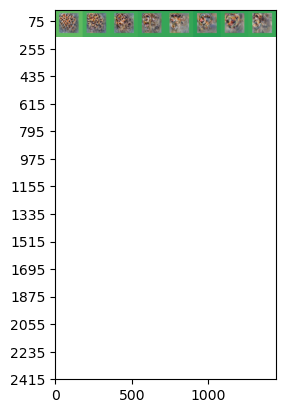

In [29]:
for i in range(size_square, len(rois_s)*size_square, size_square):
    plt.hlines(i, 0, np.max(collage.shape), color = 'k', lw = .5)
for i in range(size_square, len(rois_s)*size_square, size_square):
    plt.vlines(i, 0, np.max(collage.shape), color = 'k', lw = .5)

plt.imshow(collage.transpose(1,2,0))
plt.yticks([size_square*i+75 for i in range(14)], map(str, rois_s))
plt.xticks([size_square*i+75 for i in range(14)], map(str, layers_s))
plt.ylabel('ROIs')
plt.xlabel('Vgg layer')
plt.savefig('Bashivan_Vgg_imgs.png', dpi = 1200)